## import modules

In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

%matplotlib inline
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import warnings
import matplotlib.cm as cm
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline
from matplotlib import dates


#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# 하이퍼 파라미터 튜닝을 위한 라이브러리 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

# 데이터 정규화/전처리 라이브러리 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split

# VIF 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 모델의 성능을 판단하기위한 라이브러리 불러오기 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 선형회귀 모델 라이브러리 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
import statsmodels.api as sm

# 딥러닝을 이용한 선형회귀 라이브러리 
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

# 교차검증
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 최적의 모델을 찾는 앙상블 
from sklearn.ensemble import VotingRegressor


## 데이터 불러오기 

In [3]:
df = pd.read_csv('최종데이터/전체데이터_독립+종속_1720.csv')
df
# year: 0~6 : 각 2017상/하 2018상/하 2019상/하 2020 으로 구분됨  

,police,year,범죄발생_강도,범죄발생_살인,범죄발생_강간/강제추행,범죄검거_강간/강제추행,범죄검거_강도,범죄검거_살인,acc_case,경찰 수,...,천명당_공원수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,rob_safety_q1,mur_safety_q2,ta_safety_q3,law_order_q4,overall_q5
0,마산동부경찰서,0,0,0,5,5,0,0,30,185,...,0.320412,0.703934,3.562987,61.155591,6.313743,74.6,77.0,64.0,65.7,71.2
1,마산동부경찰서,1,0,0,6,5,0,0,36,185,...,0.324557,0.703934,3.573817,61.155591,7.472527,71.7,73.5,64.9,63.6,70.3
2,마산동부경찰서,2,0,0,5,4,0,0,34,185,...,0.328809,0.703934,3.584647,61.155591,9.313584,76.0,79.0,67.5,70.0,72.6
3,마산동부경찰서,3,0,0,6,6,0,0,31,185,...,0.333224,0.703934,3.584647,61.155591,9.941709,72.4,75.6,67.9,70.7,71.8
4,마산동부경찰서,4,0,0,7,6,0,0,36,185,...,0.337757,0.703934,3.595477,61.155591,11.609491,76.1,78.2,66.4,69.9,72.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,창원중부경찰서,2,1,0,8,6,1,0,56,201,...,0.386518,1.416245,5.748288,30.147271,9.309727,78.0,80.1,65.3,68.6,72.9
283,창원중부경찰서,3,1,0,6,6,1,0,58,201,...,0.388677,1.416245,5.789942,30.147271,10.205294,75.7,77.7,67.8,70.6,74.2
284,창원중부경찰서,4,0,0,8,7,0,0,52,201,...,0.390861,1.416245,5.800356,30.147271,13.308536,80.8,82.8,69.4,73.8,76.1
285,창원중부경찰서,5,0,0,7,11,0,0,56,201,...,0.392087,1.416245,5.852424,30.147271,14.349893,77.6,79.6,70.9,73.6,74.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   police           287 non-null    object 
 1   year             287 non-null    int64  
 2   범죄발생_강도          287 non-null    int64  
 3   범죄발생_살인          287 non-null    int64  
 4   범죄발생_강간/강제추행     287 non-null    int64  
 5   범죄검거_강간/강제추행     287 non-null    int64  
 6   범죄검거_강도          287 non-null    int64  
 7   범죄검거_살인          287 non-null    int64  
 8   acc_case         287 non-null    int64  
 9   경찰 수             287 non-null    int64  
 10  면적               287 non-null    float64
 11  경찰서 수/면적         287 non-null    float64
 12  경찰 수/면적          287 non-null    float64
 13  112신고_강도         287 non-null    int64  
 14  112신고_살인         287 non-null    int64  
 15  112신고_법질서        287 non-null    int64  
 16  112신고_교통사고       287 non-null    int64  
 17  112신고_교통불편      

In [5]:
# 사용 변수 리스트 
varList = ['year',
 '외국인_전체비율',
 '천명당_범죄발생_절도폭력',
 '천명당_범죄발생_강간추행',
 '경찰 수/면적',
 '천명당_cctv수',
 '천명당_교통사고수',
 '천명당_신고_절도폭력',
 '천명당_신고_교통불편',
 '면적당_공원수',
 '면적당_유흥업소수',
 '면적당_보안등수',
 '남성비율',
 '1인_1230비율',
 '1인_60이상비율',
 '1인_남성비율',
 '검거/발생_절도폭력',
 '면적당_cctv수']

In [6]:
# 전체데이터 사본 
df_copy = df.copy() 

In [7]:
# 사용할 데이터만 정리 
df = df[['police'] + varList+['overall_q5']]

In [8]:
# 17~19년과 20년 데이터 분리 
data = df[df.year<6]
data20 = df[df.year==6]

# 데이터분석
StandardScaler 로 데이터 전처리
히트맵을 통해 상관분석
75:25 비율로 train:test 데이터 나눠서 모델 진행
vif를 줄이는 쪽으로 변수 제거
선형회귀, 릿지, 라쏘, rf, xgboost, lightgbm 진행

## 상관분석

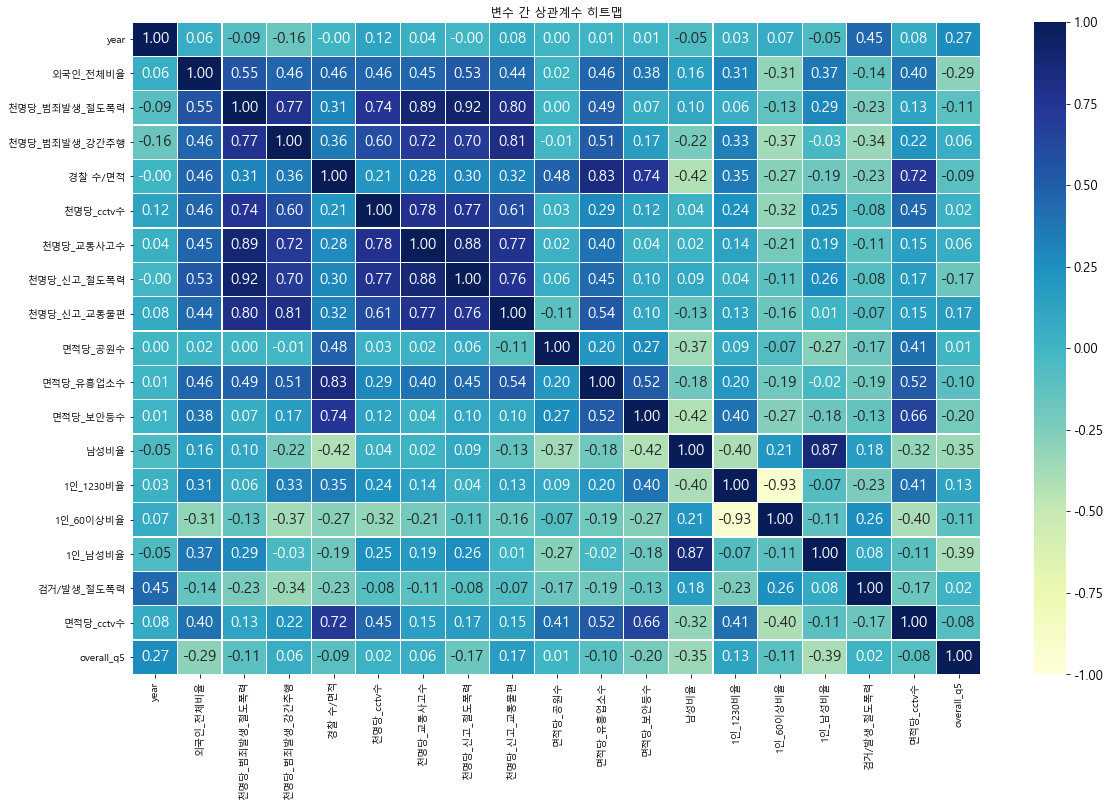

In [9]:
# 히트맵을 이용한 상관분석
plt.figure(figsize=(19,12))
ax = sns.heatmap(data=data.corr(), annot=True, fmt = '.2f', linewidths=.10, cmap='YlGnBu', vmin = -1, vmax=1,annot_kws={"size": 15})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
# ax.set_xlabels(fontsize=10)
plt.title('변수 간 상관계수 히트맵')
plt.show()

## 정규화 

In [11]:
scaler = StandardScaler()
scaler.fit(data.iloc[:,1:-1])
df2_scaled = scaler.transform(data.iloc[:,1:-1])
df2_scaled = pd.DataFrame(df2_scaled, index=data.index, columns=data.columns[1:-1])
df2_scaled

,year,외국인_전체비율,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰 수/면적,천명당_cctv수,천명당_교통사고수,천명당_신고_절도폭력,천명당_신고_교통불편,면적당_공원수,면적당_유흥업소수,면적당_보안등수,남성비율,1인_1230비율,1인_60이상비율,1인_남성비율,검거/발생_절도폭력,면적당_cctv수
0,-1.46385,-0.830226,-0.399732,-0.769165,-1.229674,-1.071395,-1.080133,-0.576443,0.316541,-1.388508,-0.501474,-1.199226,0.961697,-2.228499,1.916713,0.137979,0.096850,-1.326108
1,-0.87831,-0.824727,-0.210432,-0.648213,-1.229674,-0.967970,-0.938271,-0.561103,0.341496,-1.388508,-0.499973,-1.199226,0.941864,-2.270752,2.058983,0.117104,-0.799270,-1.311719
2,-0.29277,-0.819085,-0.408688,-0.754457,-1.229674,-0.804159,-0.972820,-0.545367,0.367095,-1.388508,-0.498472,-1.199226,0.921732,-2.312267,2.201933,0.097387,0.337921,-1.288857
3,0.29277,-0.805249,-0.133103,-0.629997,-1.229674,-0.739773,-1.030995,-0.532744,0.167639,-1.388508,-0.498472,-1.199226,0.868567,-2.348209,2.392353,-0.014589,-0.564184,-1.281057
4,0.87831,-0.790877,-0.236761,-0.502155,-1.229674,-0.583356,-0.905731,-0.335307,0.373231,-1.388508,-0.496971,-1.199226,0.813727,-2.383224,2.580990,-0.123880,-0.477416,-1.260347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.87831,-0.592315,-0.713312,-0.618683,-1.222024,-1.169825,-1.030107,-1.004572,-0.777156,-0.842833,-0.202891,-1.351504,2.304677,-0.686973,-0.419608,1.512135,0.068366,-1.298474
282,-0.29277,-0.579614,-0.726633,-0.812669,-1.222024,-1.131674,-1.029960,-1.004415,-0.776982,-0.842833,-0.198560,-1.351504,2.281748,-0.705539,-0.338744,1.457081,0.800631,-1.288905
283,0.29277,-0.571215,-0.672051,-0.939924,-1.222024,-1.084623,-1.000564,-0.973265,-0.856323,-0.842833,-0.192786,-1.351504,2.253262,-0.723502,-0.262296,1.379817,0.014783,-1.277784
284,0.87831,-0.562808,-0.657813,-0.806853,-1.222024,-0.926770,-1.073169,-0.879294,-0.683120,-0.842833,-0.191343,-1.351504,2.225089,-0.740200,-0.187270,1.308168,0.438388,-1.239248


## test/train data

In [12]:
# 학습용, 테스트용 데이터 자르기
train_x, test_x, train_y, test_y = train_test_split( df2_scaled, data.iloc[:, -1], test_size=0.25, random_state=0) 


In [13]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((184, 18), (62, 18), (184,), (62,))

In [14]:
train_x

,year,외국인_전체비율,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰 수/면적,천명당_cctv수,천명당_교통사고수,천명당_신고_절도폭력,천명당_신고_교통불편,면적당_공원수,면적당_유흥업소수,면적당_보안등수,남성비율,1인_1230비율,1인_60이상비율,1인_남성비율,검거/발생_절도폭력,면적당_cctv수
38,0.29277,-0.763154,-0.525624,-0.540197,-0.286350,-0.845051,-0.757520,-0.590500,-0.888767,0.852576,0.010817,-0.400265,-0.635450,0.269199,-0.103138,-0.555435,-0.462705,-0.633799
137,0.87831,-0.645383,0.892921,3.617522,-0.606174,1.822987,1.339142,0.563694,1.381753,-0.076708,-0.561459,-0.905564,-1.034770,0.640447,-0.870825,-1.034732,-0.885008,-0.102003
88,0.87831,-0.935856,-0.808021,-0.837737,-0.275839,-0.981788,-0.775368,-0.604433,-0.823111,0.697819,-0.540346,0.002713,-0.545391,-1.640091,1.903669,-1.023774,-0.789370,-0.751119
236,1.46385,-0.579181,-1.125285,-1.133498,-1.368056,-0.273436,-0.737800,-0.407017,-0.394624,-1.783003,-0.975710,-1.389776,0.847950,0.970193,-1.150354,1.070792,1.506261,-1.337127
257,1.46385,-0.114773,1.455793,-0.019777,-0.706832,3.690144,2.712997,2.387300,1.216268,-0.132491,-0.481019,-0.697301,1.228626,-0.534005,0.542222,1.600194,2.036429,-0.174986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.87831,-0.950289,-0.531118,-0.611949,-0.409680,-1.059444,-0.664434,-0.457807,-0.841786,1.651397,-0.754919,-0.939270,-0.576500,-0.917168,1.495044,-1.504415,-0.632947,-0.854210
224,-1.46385,0.917664,1.112119,1.565092,2.087364,-0.153074,1.204864,1.471741,1.471381,-0.017100,2.621445,2.510394,-0.339322,0.399504,-0.358788,0.228844,-1.131314,0.084510
136,0.29277,-0.679047,0.778036,2.248094,-0.606174,1.692894,1.715509,0.547204,1.780149,-0.076708,-0.565265,-0.905564,-1.067359,0.630152,-0.899406,-1.046484,-0.924229,-0.144625
54,1.46385,0.547296,-0.501319,-0.298980,0.080195,1.524807,-0.692475,-0.129437,-0.348526,-0.738570,-0.406781,0.548002,-0.716855,1.204093,-1.086697,-0.136574,1.082686,2.043750


In [15]:
train_y

38     73.6
137    81.0
88     76.3
236    75.1
257    75.1
       ... 
78     74.8
224    75.4
136    80.8
54     74.3
200    79.1
Name: overall_q5, Length: 184, dtype: float64

# 모델 적용 

## Linear Model 

In [17]:
linear_model = sm.OLS(train_y, sm.add_constant(train_x))
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:             overall_q5   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     10.60
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.81e-19
Time:                        17:52:03   Log-Likelihood:                -398.03
No. Observations:                 184   AIC:                             834.1
Df Residuals:                     165   BIC:                             895.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            73.3585      0.166    442.567

In [18]:
# 각 변수들의 p-value 데이터 프레임을 생성
df_pvalue = pd.DataFrame(linear_result.summary2().tables[1]['P>|t|'].round(2))
df_pvalue.drop('const',axis=0, inplace=True)
# 각 변수들의 VIF 데이터프레임 생성VIF 데이터프레임 생성
vif_xtrain = pd.DataFrame()
vif_xtrain["VIF_Factor"] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif_xtrain.index  = train_x.columns
vif_xtrain["VIF_Factor"]= round(vif_xtrain["VIF_Factor"],2)
# 두 데이터프레임 합치기
df_visual1 = df_pvalue.join(vif_xtrain, how='left')
df_visual1.sort_values('P>|t|')

,P>|t|,VIF_Factor
year,0.00,1.78
천명당_신고_절도폭력,0.00,9.44
천명당_cctv수,0.00,13.19
천명당_신고_교통불편,0.00,6.37
면적당_cctv수,0.00,10.72
경찰 수/면적,0.10,21.04
외국인_전체비율,0.10,3.06
1인_60이상비율,0.12,16.42
천명당_범죄발생_절도폭력,0.13,20.19
검거/발생_절도폭력,0.14,1.85


In [19]:
# VIF 10 이하의 변수만 선형모델에 사용 
vif_xtrain[ vif_xtrain.VIF_Factor<=10].sort_values('VIF_Factor')

,VIF_Factor
year,1.78
검거/발생_절도폭력,1.85
면적당_공원수,2.12
외국인_전체비율,3.06
면적당_보안등수,3.88
천명당_신고_교통불편,6.37
천명당_범죄발생_강간추행,6.49
면적당_유흥업소수,8.01
천명당_신고_절도폭력,9.44


In [20]:
# VIF 10 이하의 변수들로 새로운 훈련데이터 생성 
train_x2 = train_x[vif_xtrain[ vif_xtrain.VIF_Factor<=10].index]
train_x2

,year,외국인_전체비율,천명당_범죄발생_강간추행,천명당_신고_절도폭력,천명당_신고_교통불편,면적당_공원수,면적당_유흥업소수,면적당_보안등수,검거/발생_절도폭력
38,0.29277,-0.763154,-0.540197,-0.590500,-0.888767,0.852576,0.010817,-0.400265,-0.462705
137,0.87831,-0.645383,3.617522,0.563694,1.381753,-0.076708,-0.561459,-0.905564,-0.885008
88,0.87831,-0.935856,-0.837737,-0.604433,-0.823111,0.697819,-0.540346,0.002713,-0.789370
236,1.46385,-0.579181,-1.133498,-0.407017,-0.394624,-1.783003,-0.975710,-1.389776,1.506261
257,1.46385,-0.114773,-0.019777,2.387300,1.216268,-0.132491,-0.481019,-0.697301,2.036429
...,...,...,...,...,...,...,...,...,...
78,-0.87831,-0.950289,-0.611949,-0.457807,-0.841786,1.651397,-0.754919,-0.939270,-0.632947
224,-1.46385,0.917664,1.565092,1.471741,1.471381,-0.017100,2.621445,2.510394,-1.131314
136,0.29277,-0.679047,2.248094,0.547204,1.780149,-0.076708,-0.565265,-0.905564,-0.924229
54,1.46385,0.547296,-0.298980,-0.129437,-0.348526,-0.738570,-0.406781,0.548002,1.082686


In [21]:
# VIF 다시 확인 
vif_check = pd.DataFrame()
vif_check['VIF Factor']= [ variance_inflation_factor( train_x2.values, i )  for i in range( train_x2.shape[1] -1 ) ]
vif_check['features'] = train_x2.columns[:-1]
vif_check

# 모두 여전히 10 미만이다 


,VIF Factor,features
0,1.363615,year
1,1.635228,외국인_전체비율
2,4.472662,천명당_범죄발생_강간추행
3,2.824560,천명당_신고_절도폭력
4,4.757315,천명당_신고_교통불편
5,1.249025,면적당_공원수
6,2.145662,면적당_유흥업소수
7,1.723663,면적당_보안등수


In [22]:
# VIF 10 이하의 변수들로 새로운 테스트데이터 생성 
test_x2 = test_x[vif_xtrain[ vif_xtrain.VIF_Factor<=10].index]
test_x2

,year,외국인_전체비율,천명당_범죄발생_강간추행,천명당_신고_절도폭력,천명당_신고_교통불편,면적당_공원수,면적당_유흥업소수,면적당_보안등수,검거/발생_절도폭력
103,1.46385,0.078047,-0.409911,-0.561327,-0.646917,0.569890,-0.287607,1.066494,0.834773
126,-1.46385,-0.881925,-0.548989,-0.780068,-0.777034,1.741191,0.346829,0.652021,0.592858
86,-0.29277,-0.975426,-0.706056,-0.442220,-0.806428,0.697819,-0.547037,0.002713,-0.370310
127,-0.87831,-0.867838,-0.643942,-0.776164,-0.773713,1.741191,0.346829,0.652021,0.801043
82,1.46385,-0.897280,-0.938356,-0.535595,-0.610800,1.651397,-0.751041,-0.939270,1.305885
...,...,...,...,...,...,...,...,...,...
184,-0.29277,1.368367,1.177952,0.587591,0.945730,-0.557077,-0.328463,0.449179,-0.629820
201,1.46385,1.274434,1.362881,1.837223,3.989200,-0.749056,0.107819,-0.129279,1.431782
124,1.46385,0.254304,-0.825631,-0.612693,-0.355755,0.612643,-0.400952,0.448521,1.135751
135,-0.29277,-0.712341,2.117084,0.410571,1.285821,-0.076708,-0.569071,-0.905564,-0.857747


In [23]:
# Linear Regression Model 적용 

lr_model = LinearRegression()
lr_model.fit(train_x2,train_y)
print(lr_model.score(train_x2, train_y))
print(lr_model.score(test_x2, test_y))

y_pred = lr_model.predict(test_x2)
rms = np.sqrt(mean_squared_error(test_y, y_pred))
rms2 = np.sqrt(mean_squared_error(test_y, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.431673693757744
0.3322869282700215
2.319423711128674
1.522965433333493


## Ridge & Lasso

In [24]:
# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        train_x, train_y).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        train_x, train_y).best_estimator_,}

In [25]:
# Lasso 모델의 파라미터 
linear_models['Lasso']

Lasso(alpha=0.01)

In [26]:
# 결정계수와 오차
print(linear_models['Lasso'].score(train_x,train_y))
print(linear_models['Lasso'].score(test_x,test_y))

y_pred = linear_models['Lasso'].predict(test_x)
rms = np.sqrt(mean_squared_error(test_y, y_pred))
rms2 = np.sqrt(mean_squared_error(test_y, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5335430799307805
0.46667937841721474
2.072904725871926
1.439758565132337


In [27]:
linear_models['Ridge']

Ridge()

In [28]:
# 결정계수와 오차
print(linear_models['Ridge'].score(train_x,train_y))
print(linear_models['Ridge'].score(test_x,test_y))

y_pred = linear_models['Ridge'].predict(test_x)
rms = np.sqrt(mean_squared_error(test_y, y_pred))
rms2 = np.sqrt(mean_squared_error(test_y, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5350683495999431
0.47164337963569836
2.063235160189473
1.4363965887558605


## Random Forest

In [29]:
# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [100,200],
    'max_depth': [4, 6, 8, 10, 12],
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
RF_models = {
    'RF':GridSearchCV(
    RandomForestRegressor(random_state=0), param_grid=RF_params, n_jobs=-1).fit(train_x,train_y).best_estimator_
}

In [30]:
RF_models['RF']

RandomForestRegressor(max_depth=6, random_state=0)

In [31]:
# 결정계수와 오차
print(RF_models['RF'].score(train_x,train_y))
print(RF_models['RF'].score(test_x,test_y))

y_pred = RF_models['RF'].predict(test_x)
rms = np.sqrt(mean_squared_error(test_y, y_pred))
rms2 = np.sqrt(mean_squared_error(test_y, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.8452023965492738
0.4951057510202521
2.0169046409260583
1.4201776793507417


## XGBoost

In [32]:
# parameter 범위를 정의한다.
XGB_params = {
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
XGB_models = {
    'XGB':GridSearchCV(
    xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(train_x,train_y).best_estimator_
}

In [33]:
XGB_models['XGB']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# 결정계수와 오차
print(XGB_models['XGB'].score(train_x,train_y))
print(XGB_models['XGB'].score(test_x,test_y))

y_pred = XGB_models['XGB'].predict(test_x)
rms = np.sqrt(mean_squared_error(test_y, y_pred))
rms2 = np.sqrt(mean_squared_error(test_y, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9996474540307122
0.30526794048715766
2.365886050514296
1.5381437028165788


## LightGBM

In [35]:
# parameter 범위를 정의한다.
LGBM_params = {
    'n_estimators':[100,200,1000],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01, 0.05, 0.1]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
LGBM_models = {
    'LGBM':GridSearchCV(
    LGBMRegressor(random_state=1), param_grid=LGBM_params, n_jobs=-1).fit(train_x,train_y).best_estimator_
}

In [36]:
# 결정계수와 오차
print(LGBM_models['LGBM'].score(train_x,train_y))
print(LGBM_models['LGBM'].score(test_x,test_y))

y_pred = LGBM_models['LGBM'].predict(test_x)
rms = np.sqrt(mean_squared_error(test_y, y_pred))
rms2 = np.sqrt(mean_squared_error(test_y, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.8467908809651999
0.6134276569123518
1.764820513553655
1.3284654732260281


## MAE 확인

In [37]:
# 평가 함수 생성
def MAE_func(test, pred):
    rms = mean_absolute_error(test, pred)
    return rms

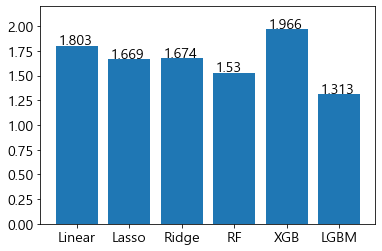

In [38]:
lr_pred = lr_model.predict(test_x2)
Lasso_pred = linear_models['Lasso'].predict(test_x)
Ridge_pred = linear_models['Ridge'].predict(test_x)
RF_pred = RF_models['RF'].predict(test_x)
XGB_pred = XGB_models['XGB'].predict(test_x)
LGBM_pred = LGBM_models['LGBM'].predict(test_x)

# test 데이터의 MSE 계산
mse_score = [MAE_func(test_y, lr_pred),
             MAE_func(test_y, Lasso_pred),
             MAE_func(test_y, Ridge_pred),
             MAE_func(test_y, RF_pred),
             MAE_func(test_y, XGB_pred),
             MAE_func(test_y, LGBM_pred)]

x_lab = ['Linear','Lasso','Ridge','RF','XGB','LGBM']

plt.bar(x_lab, mse_score, color='#1f77b4')
# plt.title('MAE Q5', fontsize=20)
# plt.xlabel('model', fontsize=18)
plt.ylabel('',fontsize=30)
plt.ylim(0.0, 2.2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i, v in enumerate(mse_score) :
    plt.text(i-0.35, v+0.01, str(np.round(v,3)), fontsize=14)
    
plt.show()

# 예측 

In [39]:
# 2020년의 데이터 
data20.head()

,police,year,외국인_전체비율,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰 수/면적,천명당_cctv수,천명당_교통사고수,천명당_신고_절도폭력,천명당_신고_교통불편,면적당_공원수,면적당_유흥업소수,면적당_보안등수,남성비율,1인_1230비율,1인_60이상비율,1인_남성비율,검거/발생_절도폭력,면적당_cctv수,overall_q5
6,마산동부경찰서,6,0.014104,0.658689,0.026138,2.003503,6.367329,0.167286,1.735594,0.878252,0.703934,3.627966,61.155591,0.501534,0.200656,0.464339,0.478467,1.023810,13.190634,NaN
13,마산중부경찰서,6,0.016111,0.409752,0.017073,0.605026,5.184502,0.273168,1.360149,0.643083,0.234341,2.066463,29.062562,0.497496,0.210154,0.497769,0.457956,1.222222,3.881541,NaN
20,서울강남경찰서,6,0.017206,0.942084,0.103852,34.607520,11.479332,0.675037,2.499861,1.554068,1.972875,24.414331,413.399562,0.478456,0.532972,0.200238,0.426766,1.031496,254.418700,NaN
27,서울강동경찰서,6,0.014320,0.554384,0.021741,16.761537,5.528621,0.219580,1.602278,0.391330,3.070816,9.084497,319.876653,0.491806,0.395381,0.306384,0.473348,0.945098,108.459510,NaN
34,서울강북경찰서,6,0.016828,0.837513,0.038954,14.645660,7.462953,0.298648,2.272322,0.506403,1.730467,7.723792,355.843118,0.487390,0.326803,0.376776,0.458750,1.011628,97.032775,NaN


In [40]:
# 데이터정규화
data_p = data20.iloc[:,1:-1]
data_p_scaled = scaler.transform(data_p)
data_p_scaled = pd.DataFrame(data_p_scaled, index=data_p.index, columns=data_p.columns)
data_p_scaled

,year,외국인_전체비율,천명당_범죄발생_절도폭력,천명당_범죄발생_강간추행,경찰 수/면적,천명당_cctv수,천명당_교통사고수,천명당_신고_절도폭력,천명당_신고_교통불편,면적당_공원수,면적당_유흥업소수,면적당_보안등수,남성비율,1인_1230비율,1인_60이상비율,1인_남성비율,검거/발생_절도폭력,면적당_cctv수
6,2.04939,-0.816222,-0.543169,-0.735206,-1.229674,-0.439121,-0.993768,-0.504694,0.001085,-1.388508,-0.492467,-1.199226,0.889780,-2.286889,2.676006,-0.074555,2.356382,-1.240712
13,2.04939,-0.753745,-0.937366,-0.941620,-1.349040,-0.653197,-0.522495,-0.776713,-0.430950,-1.748244,-0.708914,-1.356831,0.536435,-2.197256,3.132432,-0.592517,4.167820,-1.356311
20,2.04939,-0.719663,-0.094408,1.034268,1.553217,0.486085,1.266192,0.049038,1.242641,-0.416420,2.388821,0.530604,-1.129477,0.849197,-0.929918,-1.380150,2.426557,1.754801
27,2.04939,-0.809492,-0.708338,-0.835344,0.029987,-0.590916,-0.761014,-0.601284,-0.893452,0.424670,0.263886,0.071323,0.038580,-0.449256,0.519350,-0.203812,1.637773,-0.057686
34,2.04939,-0.731426,-0.259998,-0.443404,-0.150612,-0.240827,-0.409086,-0.115820,-0.682048,-0.602120,0.075273,0.247951,-0.347785,-1.096432,1.480452,-0.572460,2.245168,-0.199580
41,2.04939,-0.777649,-0.718288,-0.545463,-0.286350,-0.850026,-0.733371,-0.550856,-0.839761,0.852576,0.043391,-0.400265,-0.761379,0.473425,-0.087921,-0.687751,0.990625,-0.633799
48,2.04939,0.259930,-0.521069,-0.134544,0.022462,0.172428,-0.641483,-0.510874,-0.643825,0.093089,0.275084,0.473895,0.898514,2.135248,-1.656828,1.064908,1.234269,0.621853
55,2.04939,0.539017,-0.480847,-0.279518,0.080195,1.780427,-0.813964,-0.357773,-0.467755,-0.738570,-0.406781,0.548002,-0.766597,1.238839,-1.067768,-0.171418,1.082686,2.257495
62,2.04939,2.255711,-0.309715,-0.485820,0.274753,0.046009,-0.527683,-0.400582,-0.163237,-0.214669,-0.265193,0.404952,0.207928,-0.141354,0.292819,0.270793,0.738756,0.853423
69,2.04939,2.387452,-0.226374,-0.347796,0.405015,1.709046,-0.470675,-0.055077,-0.098171,1.029585,0.267516,0.874022,1.268847,0.116944,-0.115512,1.471358,1.726110,2.647233


In [41]:
# 예측값 데이터프레임 생성 
q5_pred = LGBM_models['LGBM'].predict(data_p_scaled)
pname = data20.police 
pred20 = pd.DataFrame( index=pname, data=q5_pred)
pred20.reset_index(drop=False, inplace=True)
pred20.rename(columns={0:'Q5_전반적안전도_예측', 'police':'경찰서명'}, inplace=True)
pred20

,경찰서명,Q5_전반적안전도_예측
0,마산동부경찰서,73.700816
1,마산중부경찰서,75.677941
2,서울강남경찰서,76.500837
3,서울강동경찰서,74.089723
4,서울강북경찰서,71.918074
5,서울강서경찰서,72.231640
6,서울관악경찰서,70.404417
7,서울광진경찰서,73.587308
8,서울구로경찰서,70.316147
9,서울금천경찰서,68.565712


In [42]:
# pred20.to_csv('q5_예측.csv', header=True, index=False, encoding='utf-8-sig')

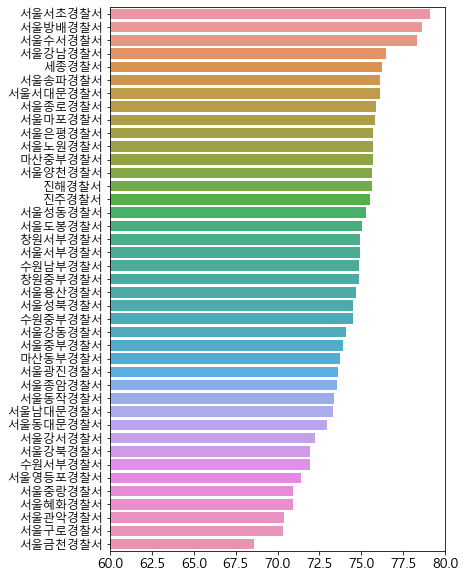

In [43]:
# 예측 시각화
plt.figure(figsize=(6,10))
sns.barplot(y='경찰서명',x='Q5_전반적안전도_예측', data = pred20.sort_values('Q5_전반적안전도_예측', ascending=False))
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.xlim(60,80)
plt.show()

In [44]:
test_x2.columns
lr_model.coef_

array([ 0.94395899, -1.04688209,  0.64227271, -1.57370811,  1.85872757,
        0.34067367, -0.48820383, -0.20805181, -0.30032202])

## 변수요인 제시 

In [45]:
test_x2.shape

(62, 9)

In [46]:
# 독립변수 계수 상위 10개, 하위 10개 추출함수
def get_top_bottom_coef(model, features) :
    coef = pd.Series(model.coef_, index= features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(6)
    coef_low = coef.sort_values(ascending=False).tail(6)
    
    return coef_high, coef_low

In [47]:
# 계수를 시각화 - 모델별로 그림을 그린다. 
def visualize_coefficient(models, features=test_x2) :
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    pal = 'pastel'
    for idx, model in enumerate(models) :
        if model != lr_model :
            features = test_x
        coef_high, coef_low = get_top_bottom_coef(model, features)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axes[idx].set_title(model.__class__.__name__+' 변수중요도', size=25)
        axes[idx].tick_params(axis='y', direction='in', pad=-300)
        axes[idx].set_xlim(-8,8)
        for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()) :
            label.set_fontsize(22)
    
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axes[idx], palette=pal)

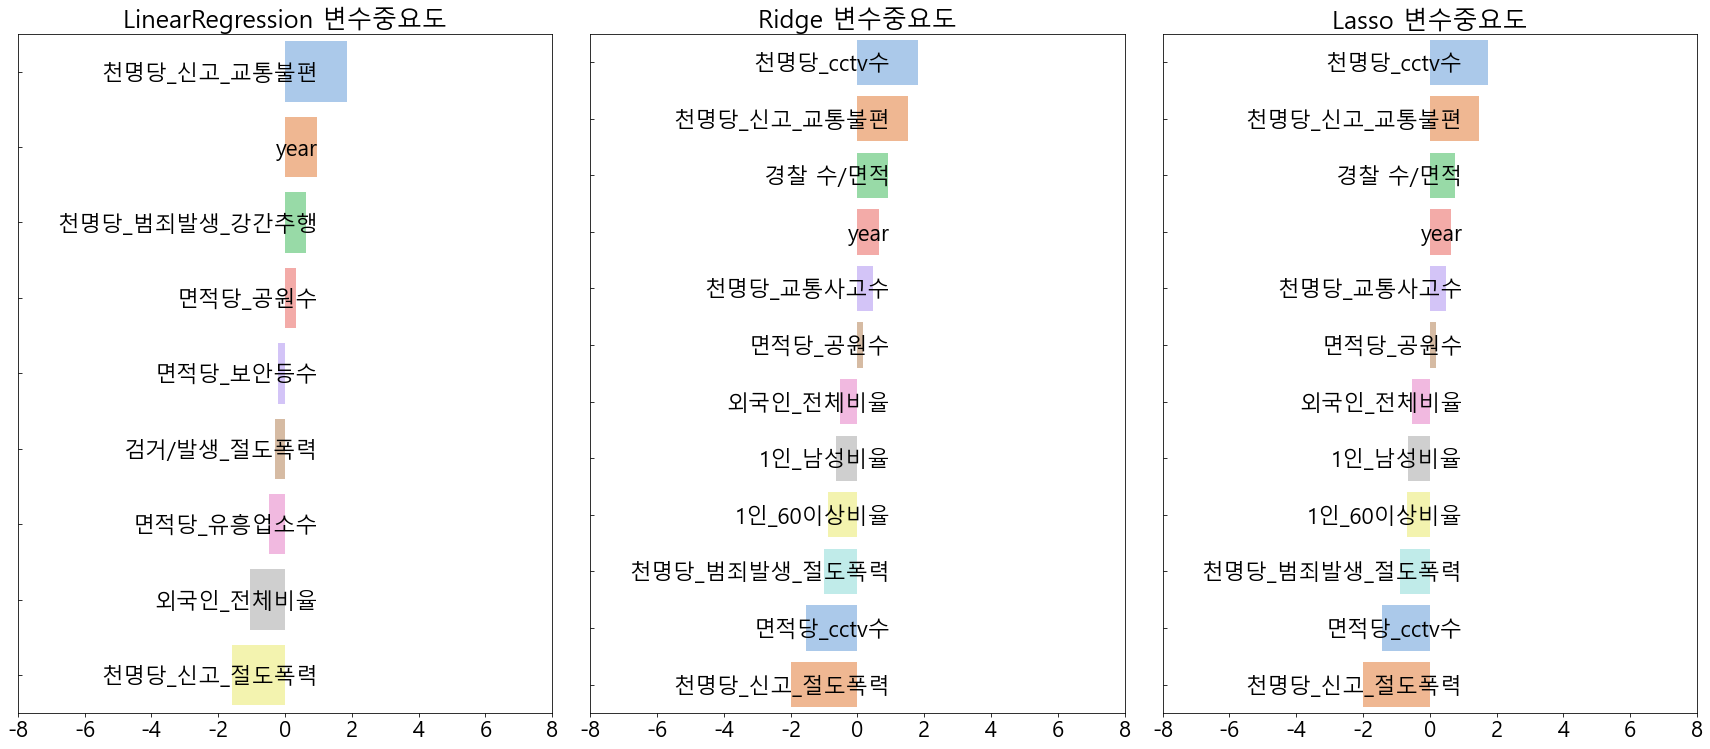

In [48]:
models = [lr_model, linear_models['Ridge'], linear_models['Lasso']]
visualize_coefficient(models, test_x2)

In [49]:
plt.rcParams["axes.axisbelow"] = False

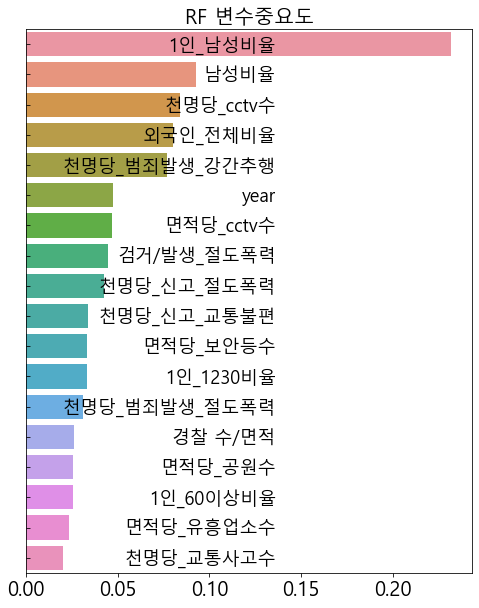

In [50]:
features = train_x.columns
x,y = (list(x) for x in zip(*sorted(zip(RF_models['RF'].feature_importances_, features), reverse=True)))
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('RF 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()


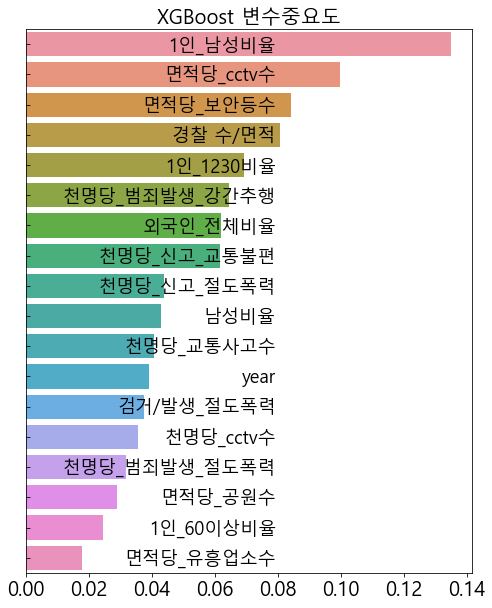

In [51]:
x,y = (list(x) for x in zip(*sorted(zip(XGB_models['XGB'].feature_importances_, features), reverse=True)))
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('XGBoost 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

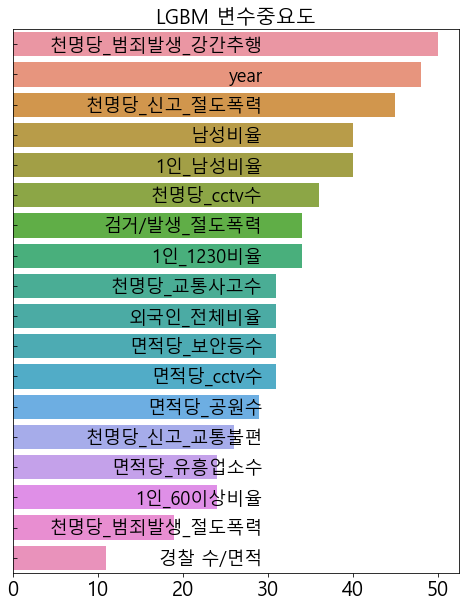

In [52]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
x,y = (list(x) for x in zip(*sorted(zip(LGBM_models['LGBM'].feature_importances_, features), reverse=True)))
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('LGBM 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()